<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/FernandoGuillermo/TrabajosPracticos/main/Datos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages_python = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

# Desarrollo del ejercicio Nº1

 Primero se realizó el conteo de los lenguajes para conocer cuales son los más utilizados. A continuación se analiza la distribución del salario neto mediante un gráfico displot y boxplot
y se calculan medidas.


In [ ]:
salary_col='salary_monthly_NETO'


In [ ]:
seaborn.displot(df_lang[salary_col], aspect=2)

In [ ]:
df_lang[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

 Se puede observar una distribución asimétrica hacia la derecha, y se puede observar una linea en el punto cero que podrían estar afectando a las medidas calculadas. Parece haber observaciones en donde el salario neto no se ha completado.

 Continuanddo, verifico la distribución salario neto mediante boxplot y extraigo el 98% de los salarios más altos.

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_lang[salary_col])
seaborn.despine()

In [ ]:

plt.figure(figsize=(12, 4))
max_limit = df_lang[salary_col].quantile(.98)
seaborn.boxenplot(x=df_lang[df_lang[salary_col] < max_limit][salary_col])

A continuación extraigo el 2% de los salarios netos más altos y observo cuales son los lenguajes más populares que utilizan las personas que más ganan.

In [ ]:
df_salarym=df_lang[df_lang[salary_col] > df_lang[salary_col].quantile(0.98)]


In [ ]:
language_countm = df_salarym.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_countm[:10]

Extraigo los lenguajes de más populares de la mustra de las personas que más ganan y comparos sus distribuciones.

In [ ]:
interesting_languages = ["python","javascript","html","sql","bash/shell","typescript",]
filtered_df_salarym = df_salarym[df_salarym.programming_language.isin(interesting_languages)]
filtered_df_salarym[:5]

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=filtered_df_salarym, x='salary_monthly_NETO', y='programming_language',
                color='blue')
plt.ticklabel_format(style='plain', axis='x')


In [ ]:
interesting_python = ["python"]
filtered_df_python = df_salarym[df_salarym.programming_language.isin(interesting_python)]
filtered_df_python[:5]

In [ ]:
filtered_df_python["salary_monthly_NETO"].describe().round()

Conclusión: tomando un subconjunto de aquellas personas que pertenecen al 2% de los que más ganan, se puede observar que los lenguajes de programación asociados a los salarios más altos son javascript, python, sql y html.
Comparando distribuciones de cada lenguaje en relación al salario neto se puede observar que la mediana para javascript y python es de 500.000. Sabiendo python hay más posibilidad de ganar entre de 500.000 y 836400, ya que un 25% de las personas que están asociadas a este lenguaje se encuentran en este intervalo.


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




 Primero voy a tomar un subconjunto de aquellos que tengan un salario bruto entre 25.000 y 200.000, y luego creo dos dataframe divido por géneroy calculo las medidas de posición y dispersión.

In [53]:
filtered_df= df[df['salary_monthly_BRUTO'] <200000]
filtered_df= filtered_df[filtered_df['salary_monthly_BRUTO'] >25000] 



In [54]:
filtered_df= filtered_df[filtered_df['salary_monthly_BRUTO'] >25000] 


In [55]:
df_H= filtered_df[ filtered_df['profile_gender']=='Hombre']
df_M=filtered_df[ filtered_df['profile_gender']=='Mujer']



In [56]:
df_H['salary_monthly_BRUTO'].describe().round()

count      4185.0
mean      97781.0
std       41698.0
min       25300.0
25%       64000.0
50%       92000.0
75%      128000.0
max      198000.0
Name: salary_monthly_BRUTO, dtype: float64

In [57]:
df_M['salary_monthly_BRUTO'].describe().round()


count       813.0
mean      89945.0
std       40600.0
min       27000.0
25%       58212.0
50%       81000.0
75%      116170.0
max      198000.0
Name: salary_monthly_BRUTO, dtype: float64

Se puede observar comparando las medidas las diferencias de salario bruto por género.

Utilizando las herremientas de visualización de seaborn mediante un hisplot segrafica la distribución de salariobruto por género.

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='Count'>

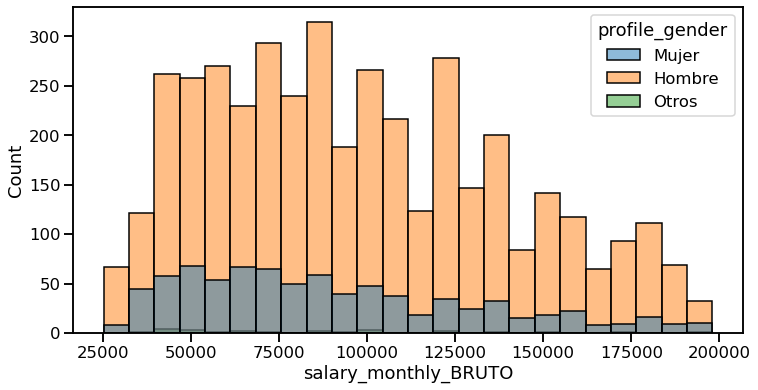

In [58]:
fig = plt.figure(figsize=(12,6))
seaborn.histplot(data=filtered_df, x='salary_monthly_BRUTO', hue='profile_gender')


El siguiente gráfico de dispersión jointplot muestra la distribucioón conjunta entre el salario bruto y el salario neto. En eleje superior y derecho se encuentran sus histogramas.se puede observar la linea en 0 y otros puntos por encima de 0.2 en salario neto. Y otra la relación positiva en ambos tipos de salarios.

<Figure size 1008x576 with 0 Axes>

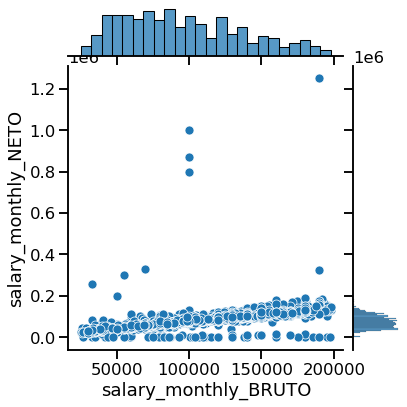

In [59]:

fig3 = plt.figure(figsize=(14,8))
seaborn.jointplot(data=filtered_df, x='salary_monthly_BRUTO', y='salary_monthly_NETO')

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

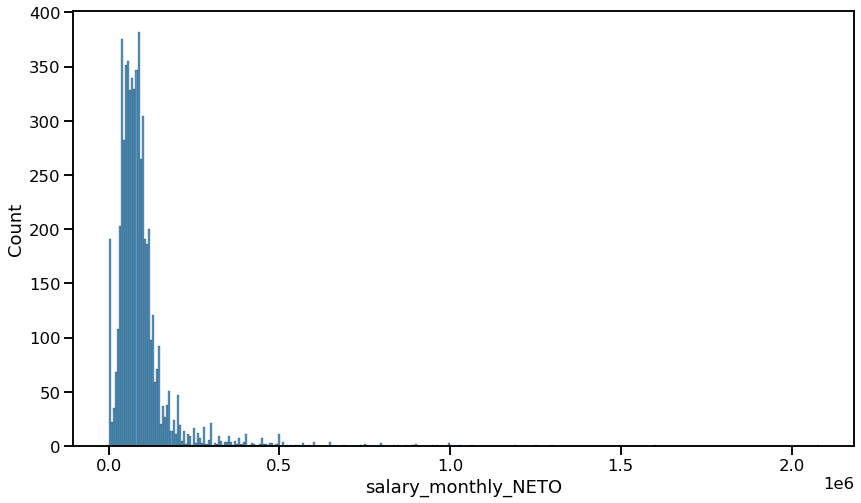

In [60]:
fig4 = plt.figure(figsize=(14,8))
seaborn.histplot(data=df, x="salary_monthly_NETO")

 A continuación vizualizo mediante opción gráfica KDE edad y salario neto, y obserbo de manera intuitiva la densidad de estimación del kernel

<Figure size 1008x576 with 0 Axes>

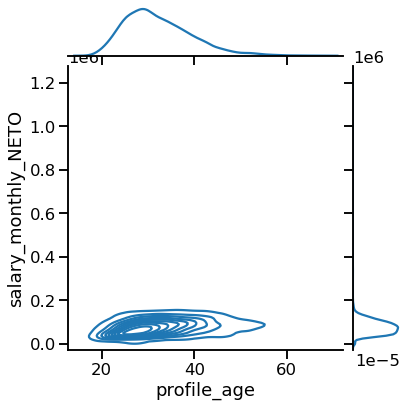

In [61]:
fig5 = plt.figure(figsize=(14,8))
seaborn.jointplot(data=filtered_df[filtered_df.profile_age < 99], x='profile_age',
                  y='salary_monthly_NETO', kind='kde')


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Se selecciona un subconjunto de personas con salario neto entre 25.000 y 200.000 y mediante un gráfico de dispersión verifico la correlación entre salario neto y salario bruto. Lo cual podría eliminarse la columna de salario bruto.

In [62]:

filtered1_df= df[df['salary_monthly_NETO'] <200000] 


filtered1_df= filtered1_df[filtered1_df['salary_monthly_NETO'] >25000] 

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='salary_monthly_NETO'>

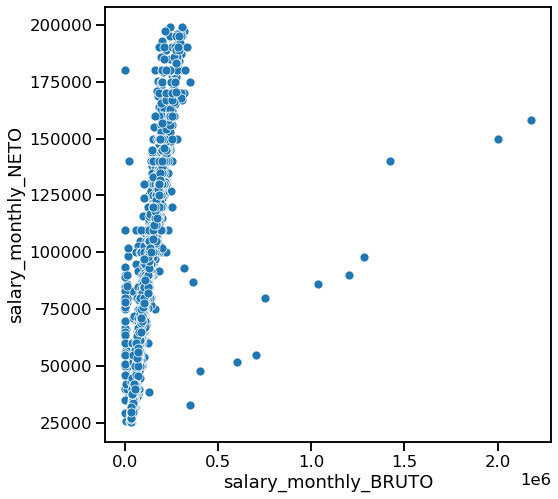

In [69]:
fign=plt.figure(figsize=(8,8))
seaborn.scatterplot(x='salary_monthly_BRUTO', y='salary_monthly_NETO', data=filtered1_df)


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Utilizo boxenplot para visualizar la distribución del salario neto según nivel de estudio y elijo nivel universitario y posgrado, luego comparo ambos histogramas.Ambas variables son independientes ya que los valores que toma una variable no afecta a la otra. Es decir, una variación en el salario de las personas que tienen estudios de posgrado es independiente de que exista variación en el salario de aquellas que tienen nivel de estudios universitarios.

In [ ]:

fig6=plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=filtered1_df, x='salary_monthly_NETO', y='profile_studies_level',
                color='blue')
plt.ticklabel_format(style='plain', axis='x')

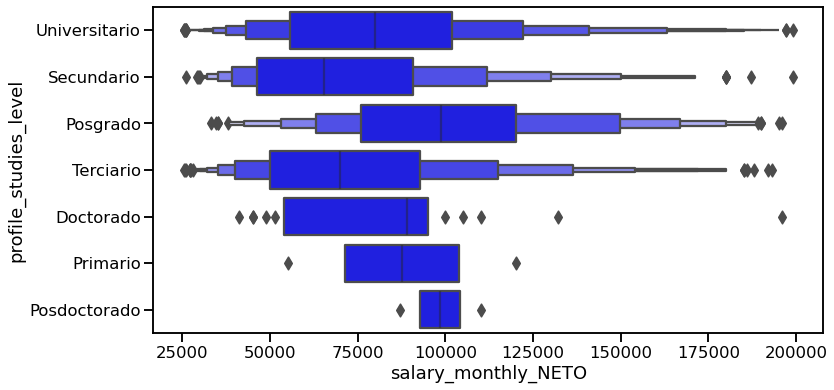

In [65]:

fig6=plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=filtered1_df, x='salary_monthly_NETO', y='profile_studies_level',
                color='blue')
plt.ticklabel_format(style='plain', axis='x')


In [ ]:
A continuación comparo ambas distribuciones.

In [66]:
filtroU_df=filtered1_df[filtered1_df['profile_studies_level']=='Universitario']
filtroP_df=filtered1_df[filtered1_df['profile_studies_level']=='Posgrado']

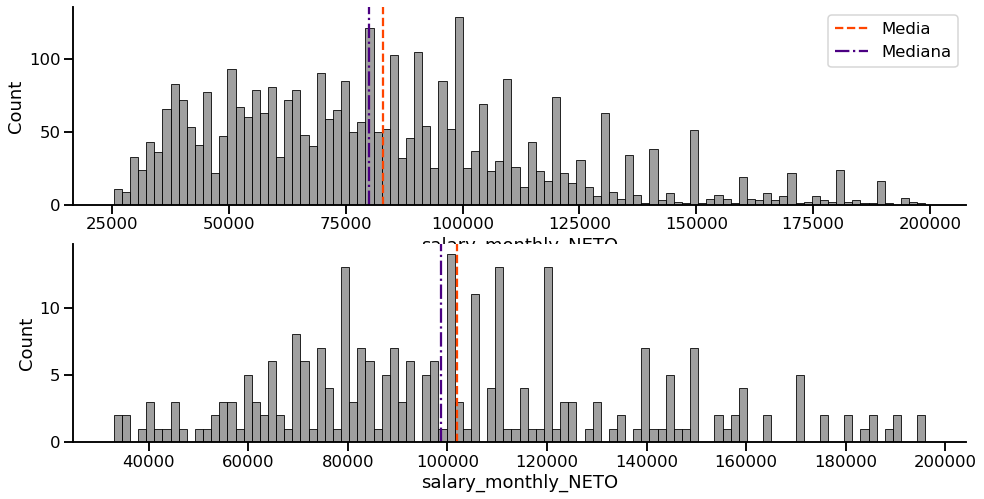

In [67]:
fig7, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(filtroU_df['salary_monthly_NETO'], bins=100, ax=axes[0], color='gray')
axes[0].axvline(filtroU_df['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(filtroU_df['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')


seaborn.histplot(filtroP_df['salary_monthly_NETO'], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtroP_df['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtroP_df['salary_monthly_NETO'].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [71]:
#creo un diccionario
medidas={'universitario':universitario,'posgrado':posgrado}


In [72]:
#armo un dataframe

medida_df=pd.DataFrame(data=medidas)

In [73]:
#finalmente realizo el calculo

medida_df[['universitario', 'posgrado']].describe().round()

,universitario,posgrado
count,3515.0,267.0
mean,82931.0,101999.0
std,34653.0,36230.0
min,25400.0,33000.0
25%,55605.0,76000.0
50%,80000.0,98800.0
75%,102000.0,120000.0
max,199000.0,196000.0


En conclusión, comparando las medianas, se puede decir que aquellas personas que tienen estudios de posgrado, pueden llegar a ganar alrededor del 25% más, que aquellas que tienen estudios universitarios.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


en el siguiente gráfico scatterplot podemos ver a través de los puntos de dispersión la correlación entre salario bruto por categoría de género. Tanto en el histograma anterior como en este grafico se puedo observar de manera intuitiva la cantidad de puntos naranjas por sobre los azules dando a entender la diferencia de participación que existe entre generos en la muestra.

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='salary_monthly_NETO'>

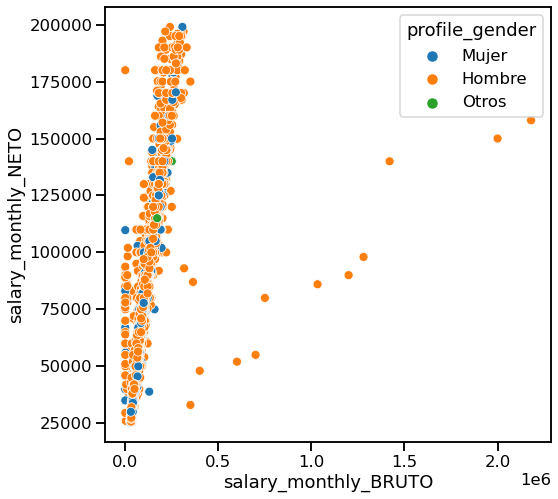

In [68]:
#realizo el punto d

fig9=plt.figure(figsize=(8,8))
seaborn.scatterplot(x='salary_monthly_BRUTO', y='salary_monthly_NETO', data=filtered1_df, hue='profile_gender')

